In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('/content/archive (5).csv')
print(data)

      Unnamed: 0    id                 comment  User  id  Photo id  \
0              0     1         unde at dolorem         2         1   
1              1     2         quae ea ducimus         3         1   
2              2     3      alias a voluptatum         5         1   
3              3     4    facere suscipit sunt        14         1   
4              4     5  totam eligendi quaerat        17         1   
...          ...   ...                     ...       ...       ...   
7483        7483  7484       accusamus vel est        82       257   
7484        7484  7485           sit nulla qui        91       257   
7485        7485  7486        sed quidem vitae        93       257   
7486        7486  7487   dolorem eveniet rerum        95       257   
7487        7487  7488  dolores nihil voluptas        96       257   

     created Timestamp posted date emoji used  Hashtags used count  
0     13-04-2023 08:04      Apr-14        yes                    1  
1     13-04-2023 08:0

Number of unique users: 77


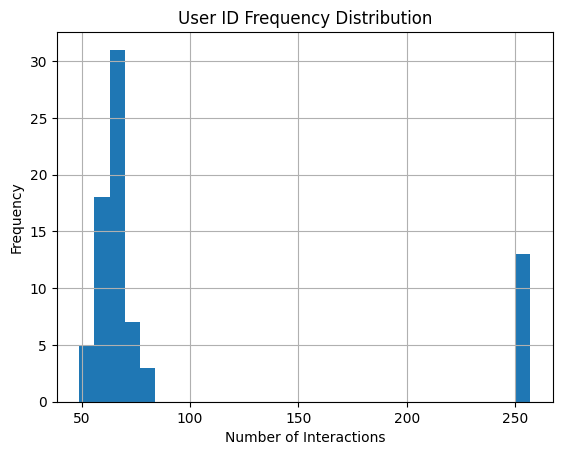

In [9]:
''' We will start with basic EDA for all the variables and then go in depth .'''
# User ID EDA
unique_users = data['User  id'].nunique()
print(f'Number of unique users: {unique_users}')
user_id_counts = data['User  id'].value_counts()
user_id_counts.hist(bins=30)
plt.xlabel('Number of Interactions')
plt.ylabel('Frequency')
plt.title('User ID Frequency Distribution')
plt.show()



In [10]:
# Photo ID EDA
unique_photos = data['Photo id'].nunique()
print(f'Number of unique photos: {unique_photos}')
photo_id_counts = data['Photo id'].value_counts()
print(photo_id_counts)
# Group data by photo ID and timestamp
photo_id_time = data.groupby(['Photo id', 'created Timestamp']).size().reset_index(name='count')



Number of unique photos: 257
13     39
157    39
247    39
8      38
146    37
       ..
144    23
199    23
16     22
230    22
179    21
Name: Photo id, Length: 257, dtype: int64


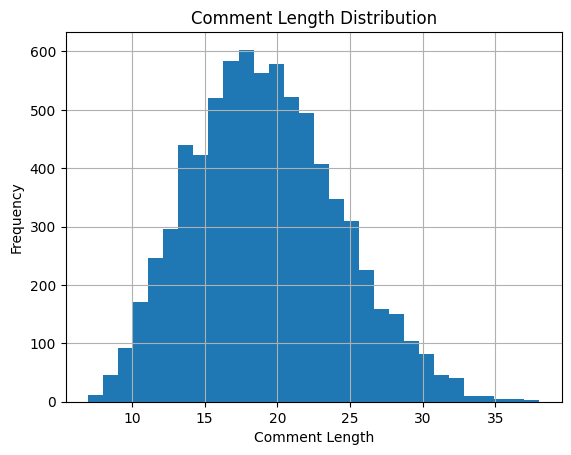

In [11]:
# Comment EDA
# Example: Comment length
data['comment_length'] = data['comment'].apply(lambda x: len(str(x)))
data['comment_length'].hist(bins=30)
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.title('Comment Length Distribution')
plt.show()


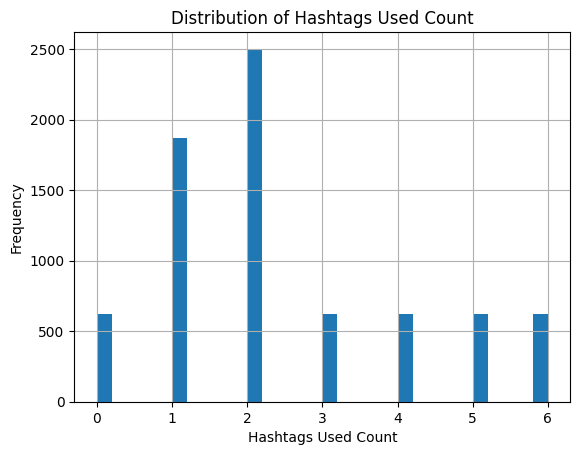

In [12]:
# Hashtags Used Count EDA
hashtags_count = data['Hashtags used count']
hashtags_count.hist(bins=30)
plt.xlabel('Hashtags Used Count')
plt.ylabel('Frequency')
plt.title('Distribution of Hashtags Used Count')
plt.show()

In [13]:
data['User  id'].unique()

array([  2,   3,   5,  14,  17,  21,  24,  31,  36,  41,  52,  54,  55,
        57,  62,  63,  66,  71,  72,  75,  76,  78,  87,  91,  98,  15,
        18,  19,  28,  30,  35,  42,  43,  47,  48,  60,  65,  82,  85,
        95,  27,  37,  38,  44,  50,  67,  70,  79,  97,   6,   8,  11,
        20,  22,  26,  33, 100,  84,  94,  46,  61,  73,  93,  99,   9,
        10,  40,  56,  92,  32,  39,  96,  69,  12,  13,  16,   4])

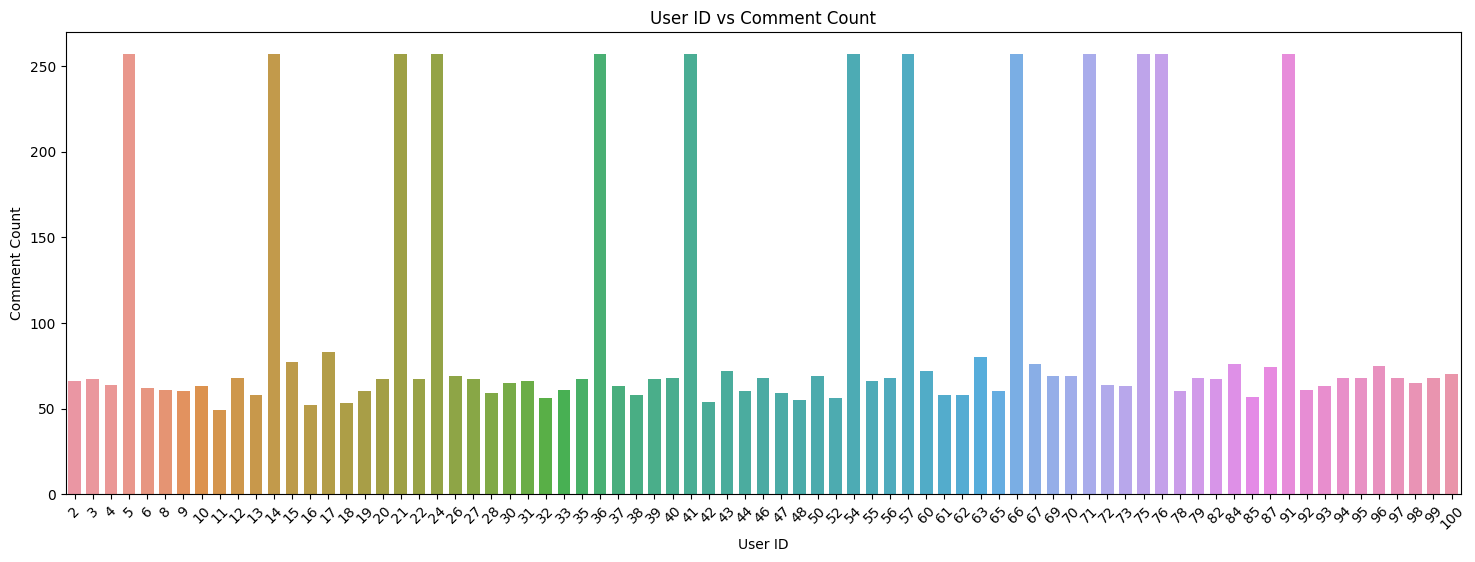

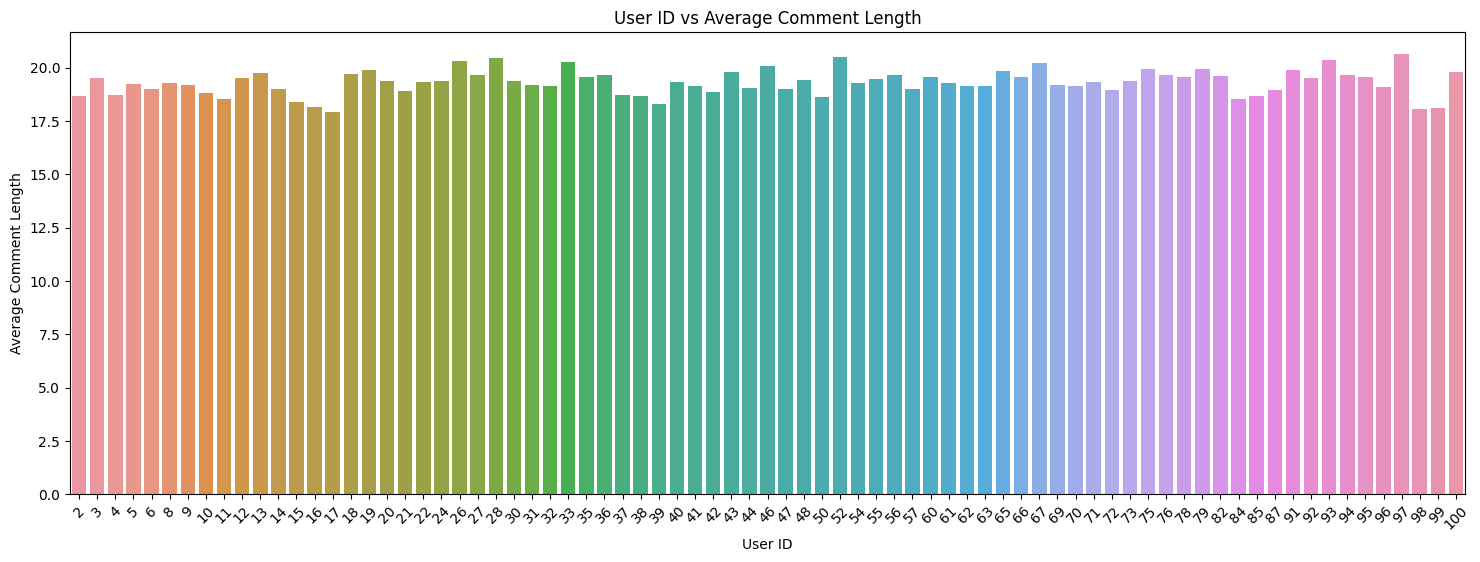

'Role in Content Discoverability:\nQuality of Engagement: Analyzing the average comment length per user helps gauge the quality of engagement. Users who consistently provide\n longer comments may contribute more substantial content to the platform.\n\nContent Depth: Longer comments may indicate a more in-depth discussion or expression of thoughts. Platforms may use this information to\nidentify and promote content that encourages meaningful interactions.\n\nUser Influence: Users with a higher average comment length may have a greater influence on content discoverability, as their\n contributions are more likely to capture the attention of others.\n\nImpact on Explore Pages:\nAlgorithmic Ranking: Social media platforms often consider content quality in their algorithms. Users with a higher average\ncomment length may have their content ranked more favorably, impacting its visibility on explore pages.\n\nUser Recommendations: Platforms may use the average comment length to make personali

In [14]:
# exploring the distribution of comments per user
import seaborn as sns
comment = data.groupby('User  id')['comment'].count().reset_index()
comment.columns = ['User id', 'Comment Count']

plt.figure(figsize=(18, 6))
sns.barplot(x='User id', y='Comment Count', data=comment,width=0.7)
plt.title('User ID vs Comment Count')
plt.xlabel('User ID')
plt.ylabel('Comment Count')
plt.xticks(rotation=45)  # Adjust the rotation angle as needed
plt.show()

# analyse the average length of comments per user.
data['Comment length']= data['comment'].apply(len)
user_avg_comment_length= data.groupby('User  id')['Comment length'].mean().reset_index()
user_avg_comment_length.columns = ['User id', 'Average Comment Length']

plt.figure(figsize=(18, 6))
sns.barplot(x='User id', y='Average Comment Length', data=user_avg_comment_length)
plt.title('User ID vs Average Comment Length')
plt.xlabel('User ID')
plt.ylabel('Average Comment Length')
plt.xticks(rotation=45)
plt.show()

'''Role in Content Discoverability:
Quality of Engagement: Analyzing the average comment length per user helps gauge the quality of engagement. Users who consistently provide
 longer comments may contribute more substantial content to the platform.

Content Depth: Longer comments may indicate a more in-depth discussion or expression of thoughts. Platforms may use this information to
identify and promote content that encourages meaningful interactions.

User Influence: Users with a higher average comment length may have a greater influence on content discoverability, as their
 contributions are more likely to capture the attention of others.

Impact on Explore Pages:
Algorithmic Ranking: Social media platforms often consider content quality in their algorithms. Users with a higher average
comment length may have their content ranked more favorably, impacting its visibility on explore pages.

User Recommendations: Platforms may use the average comment length to make personalized content recommendations. Users who engage
with longer comments might receive recommendations aligned with their preference for more detailed content.

Community Building: Longer comments may contribute to community building by fostering deeper conversations. Platforms may prioritize
content from users who contribute to a more engaged and communicative community.

Content Relevance: Platforms may consider longer comments as a signal of content relevance. Content with detailed comments may be
deemed more valuable and, therefore, have a higher chance of appearing on explore pages.'''

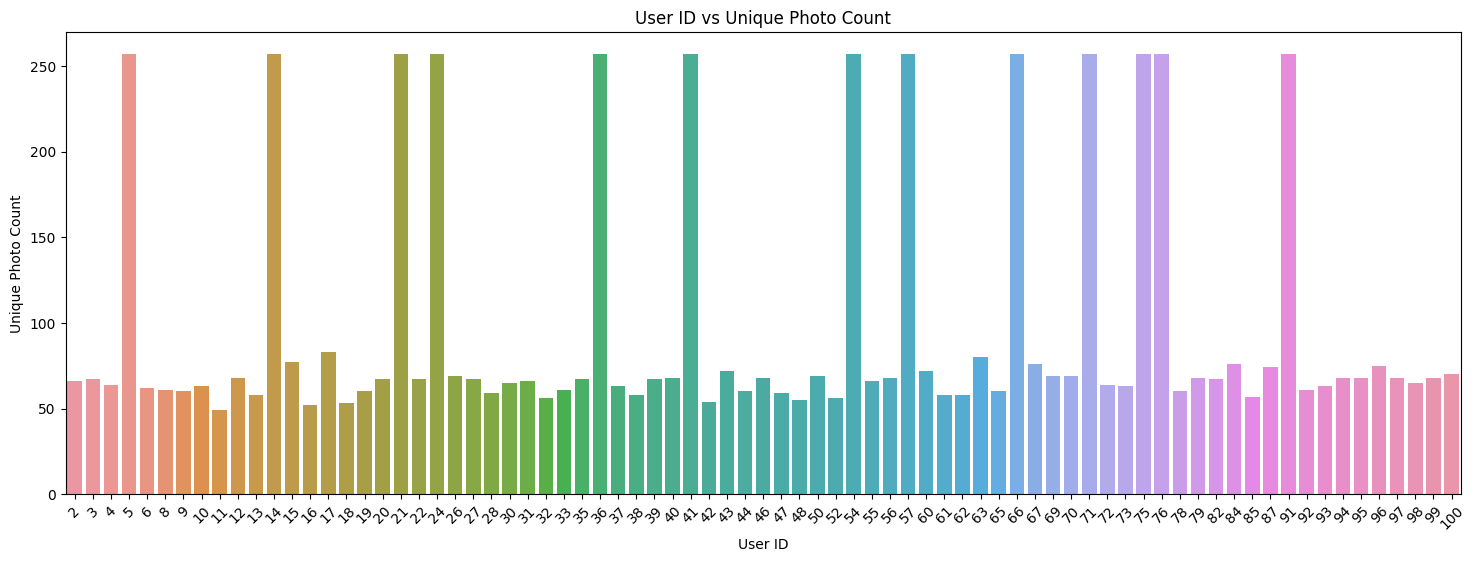

In [15]:
 # Count the number of unique Photo IDs for each User ID
user_photo_counts = data.groupby('User  id')['Photo id'].nunique().reset_index()
user_photo_counts.columns = ['User ID', 'Unique Photo Count']

plt.figure(figsize=(18, 6))
sns.barplot(x='User ID', y='Unique Photo Count', data=user_photo_counts)
plt.title('User ID vs Unique Photo Count')
plt.xlabel('User ID')
plt.ylabel('Unique Photo Count')
plt.xticks(rotation=45)
plt.show()

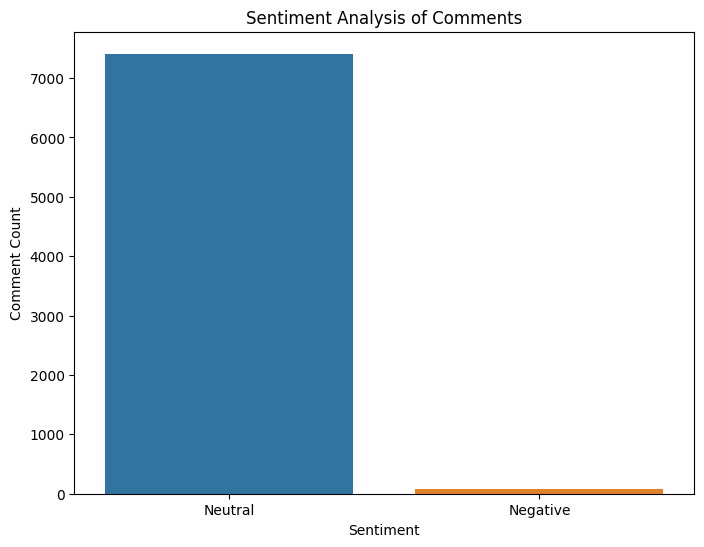

In [16]:
# Analsing whether the comment is positive, neutral or negative

from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(comment):
  analysis = TextBlob(str(comment))
   # Classify the polarity of the comment
  if analysis.sentiment.polarity > 0:
    return 'Positive'
  elif analysis.sentiment.polarity ==0:
    return 'Neutral'
  else:
    return 'Negative'

# Apply sentiment analysis to each comment
data['Sentiment'] = data['comment'].apply(get_sentiment)

#EDA

# Count the number of comments per sentiment
sentiment_counts = data['Sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Comment Count']

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='Sentiment', y='Comment Count', data=sentiment_counts)
plt.title('Sentiment Analysis of Comments')
plt.xlabel('Sentiment')
plt.ylabel('Comment Count')
plt.show()

<ipython-input-17-e0367b7023ea>:34: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


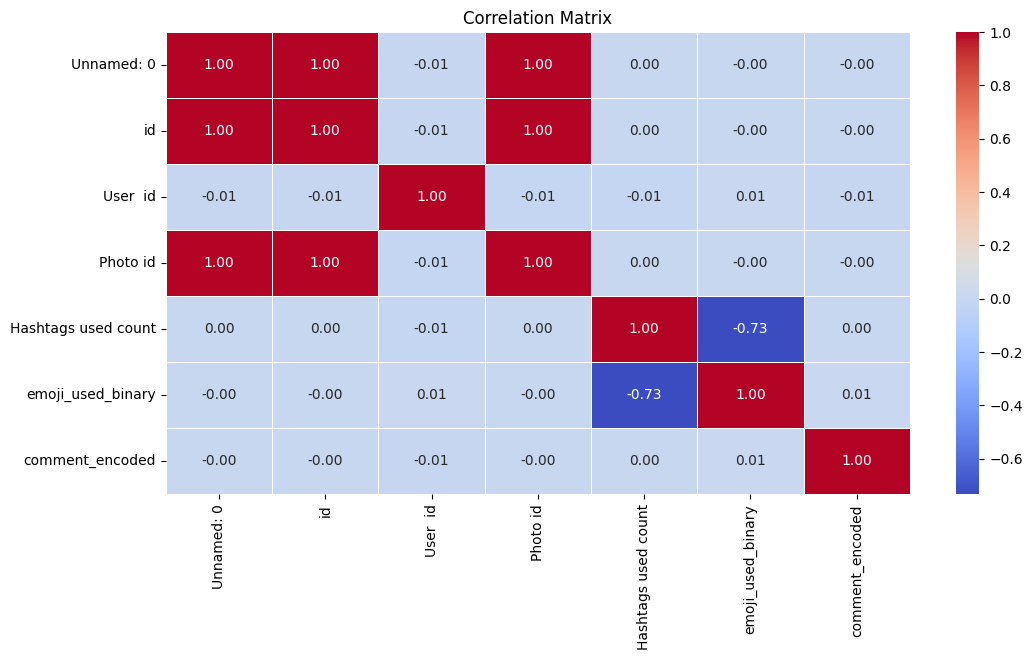

Classification Report:
               precision    recall  f1-score   support

          no       1.00      1.00      1.00       756
         yes       1.00      1.00      1.00       742

    accuracy                           1.00      1498
   macro avg       1.00      1.00      1.00      1498
weighted avg       1.00      1.00      1.00      1498

Confusion Matrix:
 [[756   0]
 [  0 742]]


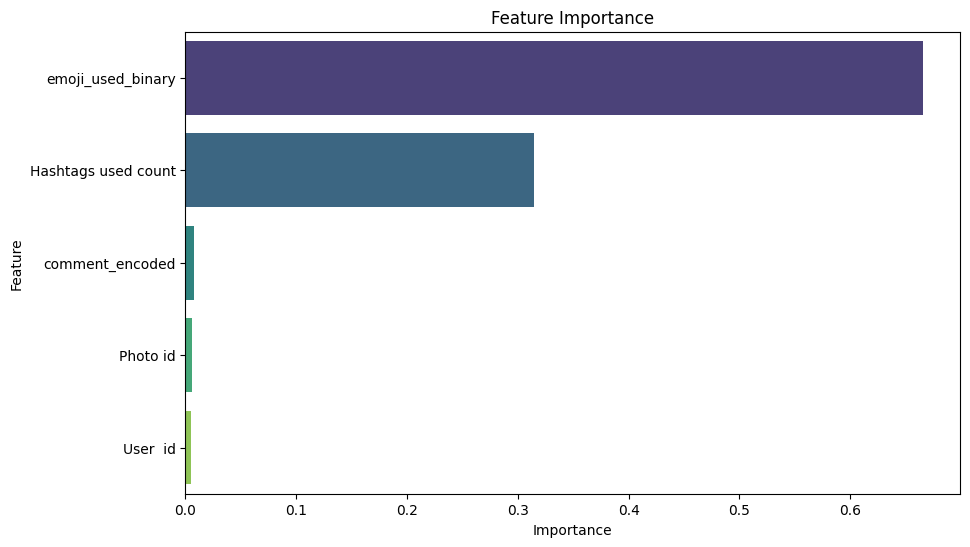

In [17]:
''' Now we will build certain models to get more insights. Suppose we want to decide whether emoji will be used
or not on any new post that appears. We can do this by taking into account which comment is posted and hashtags
used by analyzing our model. Now, if emoji is used then certain type of content will be shown on users explore page
and if it is not used, then different type of content will appear. We do this by building RandomForestRegressor model. '''



import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load your data
# Replace 'your_instagram_data.csv' with the actual file name
data = pd.read_csv('/content/archive (5).csv')

# Data Preprocessing
# Assuming 'emoji used' has 'yes' and 'no' values
data['emoji_used_binary'] = data['emoji used'].apply(lambda x: 1 if x.lower() == 'yes' else 0)

# Encode the 'comment' column to numeric values
label_encoder = LabelEncoder()
data['comment_encoded'] = label_encoder.fit_transform(data['comment'])

# Define features and target
features = ['comment_encoded', 'User  id', 'Photo id', 'emoji_used_binary', 'Hashtags used count']
target = 'emoji used'  # Replace with the correct column name

# Explore data
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Analyze impact on content discoverability
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=50, max_features=1, random_state=42)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
print('Classification Report:\n', classification_report(y_test, predictions))
print('Confusion Matrix:\n', confusion_matrix(y_test, predictions))

# Feature importance
feature_importance = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance')
plt.show()


In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Load your data
# 'your_instagram_data.csv' ko actual file name se replace karein
data = pd.read_csv('/content/archive (5).csv')

# Data Preprocessing
# 'emoji used' mein 'yes' aur 'no' values hain
data['emoji_used_binary'] = data['emoji used'].apply(lambda x: 1 if x.lower() == 'yes' else 0)

# 'comment' column ko numeric values mein encode karein
label_encoder = LabelEncoder()
data['comment_encoded'] = label_encoder.fit_transform(data['comment'])

# Features aur target ko define karein
features = ['comment_encoded', 'User  id', 'Photo id', 'emoji_used_binary', 'Hashtags used count']
target = 'emoji used'  # Sahi column name se replace karein

# Random Forest Classifier train karein
model = RandomForestClassifier(n_estimators=50, max_features=1, random_state=42)
model.fit(data[features], data[target])

# Sample input values for prediction
sample_comment = "tenetur voluptas aspernatur"
sample_user_id = "98"
sample_photo_id = "1"
sample_hashtags_used_count = 1

# Preprocess input data for prediction
sample_comment_encoded = label_encoder.transform([sample_comment])[0]
input_data = pd.DataFrame({
    'comment_encoded': [sample_comment_encoded],
    'User  id': [sample_user_id],
    'Photo id': [sample_photo_id],
    'emoji_used_binary': [1],  # Assuming emoji is used
    'Hashtags used count': [sample_hashtags_used_count]
})

# Make prediction
prediction = model.predict(input_data)

# Display prediction
print(f"\nPrediction: {prediction[0]}")



Prediction: yes


<ipython-input-11-df0b0e39f5b5>:28: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


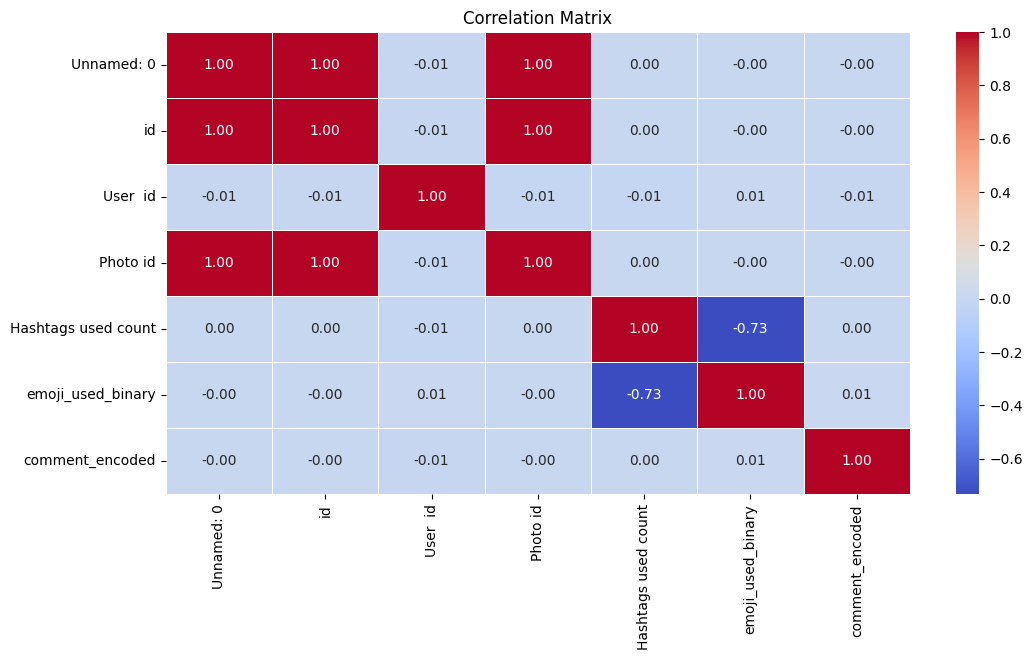

Classification Report:
               precision    recall  f1-score   support

          no       1.00      1.00      1.00       756
         yes       1.00      1.00      1.00       742

    accuracy                           1.00      1498
   macro avg       1.00      1.00      1.00      1498
weighted avg       1.00      1.00      1.00      1498

Confusion Matrix:
 [[756   0]
 [  0 742]]


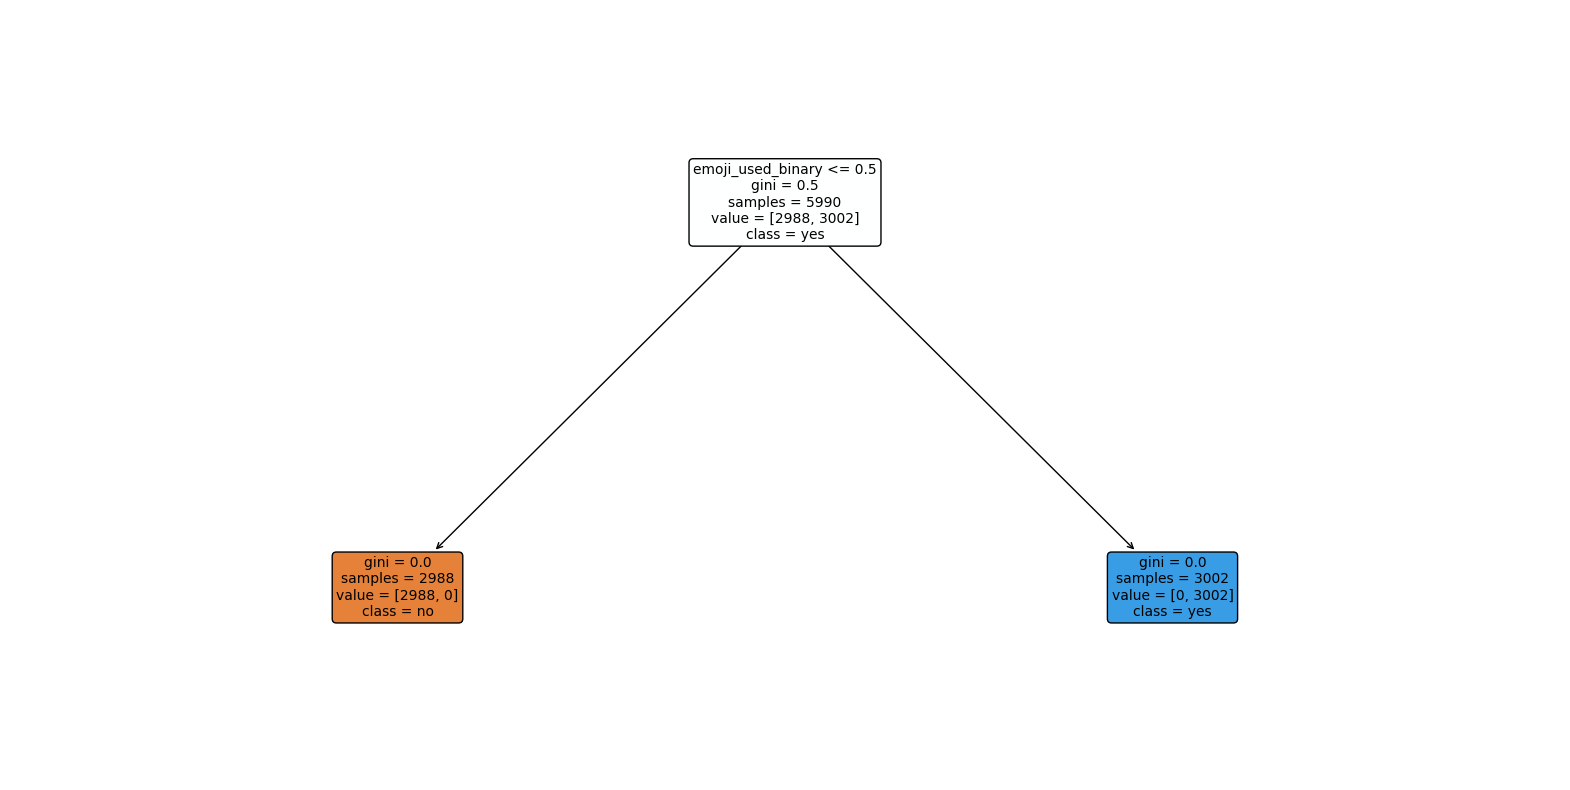

In [ ]:
# Another way to bulid the model is by using decision tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Import DecisionTreeClassifier and plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load your data
# Replace 'your_instagram_data.csv' with the actual file name
data = pd.read_csv('/content/archive (5).csv')

# Data Preprocessing
# Assuming 'emoji used' has 'yes' and 'no' values
data['emoji_used_binary'] = data['emoji used'].apply(lambda x: 1 if x.lower() == 'yes' else 0)

# Encode the 'comment' column to numeric values
label_encoder = LabelEncoder()
data['comment_encoded'] = label_encoder.fit_transform(data['comment'])

# Define features and target
features = ['comment_encoded', 'User  id', 'Photo id', 'emoji_used_binary', 'Hashtags used count']
target = 'emoji used'  # Replace with the correct column name

# Explore data
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Analyze impact on content discoverability
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Train a Decision Tree Classifier (changed from RandomForestClassifier)
model = DecisionTreeClassifier( random_state=42)  # Changed to DecisionTreeClassifier
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
print('Classification Report:\n', classification_report(y_test, predictions))
print('Confusion Matrix:\n', confusion_matrix(y_test, predictions))

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=features, class_names=model.classes_.astype(str), filled=True, rounded=True, fontsize=10)
plt.show()
